<h2>Multi-class single-label classification, pre and post SMOTE</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.svm import LinearSVC, SVC
import time

/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint, loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../file_csv/df_users_annotated_10.csv")

In [4]:
df = df.rename(columns={"cluster_0": "extreme_toxic_group", "cluster_2":"moderated_toxic_group", "cluster_3":"obscene_toxic_group"})

In [5]:
list_columns = df.columns.to_list()

In [6]:
df["toxic_annotation"].value_counts()
#not balanced

toxic_annotation
non-toxicity    7878
vulgarity       7496
harassment       297
racism            34
violence          16
Name: count, dtype: int64

/var/folders/5p/ssqpg4td2mn8_4_dm85f8n5m0000gn/T/ipykernel_25303/3474304000.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='toxicity', y='count', data=counts_df, palette = "colorblind")


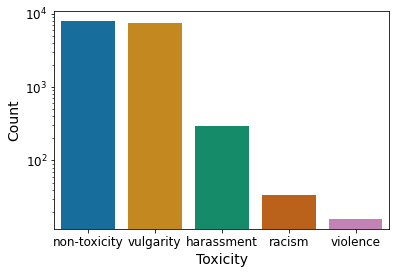

In [7]:
#number of members for each class
counts = df['toxic_annotation'].value_counts()

counts_df = counts.reset_index()
counts_df.columns = ['toxicity', 'count']

# Countplot
sns.barplot(x='toxicity', y='count', data=counts_df, palette = "colorblind")

plt.xlabel('Toxicity', fontsize=14) 
plt.ylabel('Count', fontsize=14) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

# log-scale for better visualization
plt.yscale('log')
plt.show()

## features extracted for classifications

In [16]:
features_impo = ['ratio_toxic',
 'severe_toxicity_sum',
 'insult_max',
 'fear_max',
 'obscene_mean',
 'severe_toxicity_mean',
 'insult_sum',
 'severe_toxicity_max',
 'bitch_sum',
 'extreme_toxic_group',
 'dumb_sum',
 'obscene_max',
 'fuckin_sum',
 'fuck_sum',
 'tox_over',
 'identity_attack_max',
 'toxicity_mean',
 'identity_attack_sum',
 'threat_mean',
 'insult_mean',
 'obscene_sum',
 'fucking_sum',
 'toxic_posts',
 'identity_attack_mean',
 'toxicity_max',
 'racist_sum',
 'moderated_toxic_group',
 'toxicity_sum',
 'disgust_mean',
 'shit_sum',
 'obscene_toxic_group',
 'threat_sum',
 'toxic_sum',
 'threat_max']

## NO SMOTE

In [17]:
#X è il dataset con le feature giuste per la classificazione
X = df.loc[:,features_impo]
y = df["toxic_annotation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11004, 34), (11004,), (4717, 34), (4717,))

## Random Forest

In [19]:
'''
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'criterion': ["gini", "entropy"], # log_loss doesn't work
              'max_features': ["sqrt", "log2", None],
              'n_estimators': [int(x) for x in np.linspace(100,1000,num=10)],
              'class_weight': ["balanced", None, "balanced_subsample"]
             }

grid_rdmforest = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                    param_distributions=param_list,
                    cv=RepeatedStratifiedKFold(random_state=0, n_splits=3, n_repeats=5),
                    n_jobs=-1,
                    n_iter=100)
grid_rdmforest.fit(X_train, y_train)
'''

'\nparam_list = {\'min_samples_split\': [2, 5, 10, 20],\n              \'min_samples_leaf\': [1, 5, 10, 20],\n              \'criterion\': ["gini", "entropy"], # log_loss doesn\'t work\n              \'max_features\': ["sqrt", "log2", None],\n              \'n_estimators\': [int(x) for x in np.linspace(100,1000,num=10)],\n              \'class_weight\': ["balanced", None, "balanced_subsample"]\n             }\n\ngrid_rdmforest = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),\n                    param_distributions=param_list,\n                    cv=RepeatedStratifiedKFold(random_state=0, n_splits=3, n_repeats=5),\n                    n_jobs=-1,\n                    n_iter=100)\ngrid_rdmforest.fit(X_train, y_train)\n'

In [20]:
#grid_rdmforest.best_params_

In [21]:
rf_balanced = RandomForestClassifier(n_estimators=1000, 
                             criterion='entropy', 
                             min_samples_split=20, 
                             min_samples_leaf=1,  
                             max_features=None, 
                             n_jobs=-1,
                             class_weight='balanced_subsample')
rf_balanced.fit(X_train, y_train)

y_pred = rf_balanced.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))


Accuracy 0.9340682637269451
F1-score [0.59405941 0.94943585 0.33333333 0.18181818 0.93728775]
              precision    recall  f1-score   support

  harassment      0.536     0.667     0.594        90
non-toxicity      0.951     0.948     0.949      2397
      racism      0.250     0.500     0.333         6
    violence      0.111     0.500     0.182         2
   vulgarity      0.943     0.932     0.937      2222

    accuracy                          0.934      4717
   macro avg      0.558     0.709     0.599      4717
weighted avg      0.938     0.934     0.936      4717



# DT

In [22]:
'''
param_grid = {
    "min_samples_split": uniform(0.0005,0.0003),
    "min_samples_leaf": uniform(0.004, 0.001),
    "max_depth": randint(2, 150),
    "criterion": ["gini", "entropy", "log_loss"],
    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),
    #"max_leaf_nodes" : randint(80, 140),
    #"min_impurity_decrease" : uniform(0.0001, 1e0),
    "ccp_alpha" : uniform(0.002, 0.0005)
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "min_samples_split": uniform(0.0005,0.0003),\n    "min_samples_leaf": uniform(0.004, 0.001),\n    "max_depth": randint(2, 150),\n    "criterion": ["gini", "entropy", "log_loss"],\n    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),\n    #"max_leaf_nodes" : randint(80, 140),\n    #"min_impurity_decrease" : uniform(0.0001, 1e0),\n    "ccp_alpha" : uniform(0.002, 0.0005)\n}\ngrid = RandomizedSearchCV(\n    DecisionTreeClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter=500,\n)\ngrid.fit(X_train, y_train)\nclf = grid.best_estimator_\n'

In [23]:
#print(grid.best_params_, grid.best_score_)

In [24]:
#decision tree
dt = DecisionTreeClassifier(ccp_alpha = 0.0021, max_depth = 109, criterion = "entropy", min_samples_leaf=0.0042,random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.91562433750265
F1-score [0.4125     0.93073865 0.         0.         0.91909962]
              precision    recall  f1-score   support

  harassment      0.471     0.367     0.413        90
non-toxicity      0.934     0.928     0.931      2397
      racism      0.000     0.000     0.000         6
    violence      0.000     0.000     0.000         2
   vulgarity      0.910     0.928     0.919      2222

    accuracy                          0.916      4717
   macro avg      0.463     0.444     0.452      4717
weighted avg      0.912     0.916     0.914      4717



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [25]:
#Scaling only on training set for entropy reasons
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [26]:
'''
param_grid = {
    "n_neighbors": randint(12,60),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean", "minkowski"]
}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter = 50,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "n_neighbors": randint(12,60),\n    "weights": ["uniform", "distance"],\n    "metric": ["manhattan", "euclidean", "minkowski"]\n}\n\ngrid = RandomizedSearchCV(\n    KNeighborsClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter = 50,\n)\ngrid.fit(X_train_norm, y_train)\nclf = grid.best_estimator_\n'

In [27]:
#print(grid.best_params_, grid.best_score_)

In [28]:
knn = KNeighborsClassifier(n_neighbors=22, metric="manhattan", weights = "distance")
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9130803476786092
F1-score [0.10416667 0.9304878  0.28571429 0.66666667 0.91243194]
              precision    recall  f1-score   support

  harassment      0.833     0.056     0.104        90
non-toxicity      0.907     0.955     0.930      2397
      racism      1.000     0.167     0.286         6
    violence      1.000     0.500     0.667         2
   vulgarity      0.920     0.905     0.912      2222

    accuracy                          0.913      4717
   macro avg      0.932     0.516     0.580      4717
weighted avg      0.912     0.913     0.905      4717



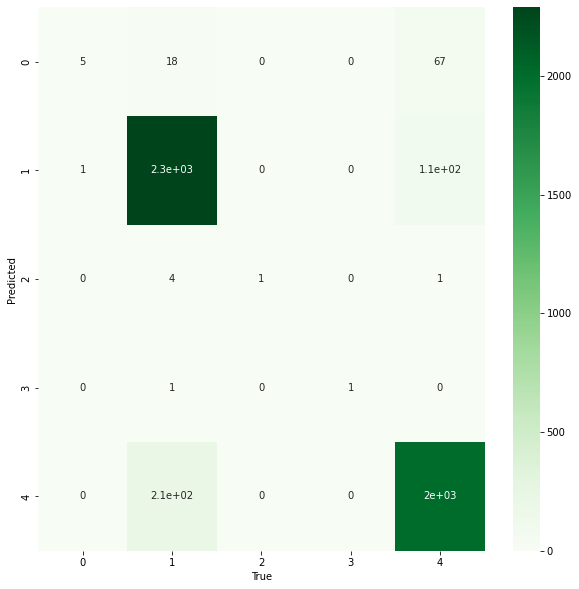

In [29]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## logistic regression

In [30]:
log_reg = LogisticRegression(C=0.05, multi_class='multinomial', solver='saga', class_weight="balanced", max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))


Accuracy 0.8327326690693237
F1-score [0.29561201 0.89421842 0.10810811 0.03508772 0.86117876]
              precision    recall  f1-score   support

  harassment      0.187     0.711     0.296        90
non-toxicity      0.919     0.871     0.894      2397
      racism      0.057     1.000     0.108         6
    violence      0.018     1.000     0.035         2
   vulgarity      0.938     0.796     0.861      2222

    accuracy                          0.833      4717
   macro avg      0.424     0.876     0.439      4717
weighted avg      0.913     0.833     0.866      4717



## SVM

In [31]:
svm = LinearSVC(C=1.0, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9120203519185923
F1-score [0.528      0.92494437 0.66666667 0.57142857 0.90959282]
              precision    recall  f1-score   support

  harassment      0.943     0.367     0.528        90
non-toxicity      0.898     0.954     0.925      2397
      racism      0.667     0.667     0.667         6
    violence      0.400     1.000     0.571         2
   vulgarity      0.930     0.890     0.910      2222

    accuracy                          0.912      4717
   macro avg      0.768     0.775     0.720      4717
weighted avg      0.914     0.912     0.910      4717



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Oversampled

In [32]:
sm = SMOTE(k_neighbors=10, random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
#USA QUESTI NEI MODELLI

Resampled dataset shape Counter({'harassment': 5481, 'vulgarity': 5481, 'non-toxicity': 5481, 'violence': 5481, 'racism': 5481})


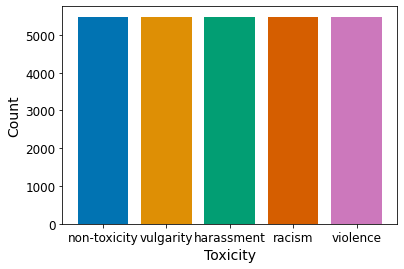

In [33]:
counter = Counter(y_res)
items = list(counter.keys())
counts = list(counter.values())

# Definisci l'ordine desiderato
desired_order = ['non-toxicity', 'vulgarity', 'harassment', 'racism', 'violence']

# Riordina i dati in base all'ordine desiderato
ordered_counts = [counter[item] for item in desired_order]
palette = sns.color_palette("colorblind", len(items))

# Crea il grafico con l'ordine specifico
plt.bar(desired_order, ordered_counts, color=palette)

# Aggiungi etichette
plt.xlabel('Toxicity', fontsize=14)  # Aumenta il font dell'asse X
plt.ylabel('Count', fontsize=14)  # Aumenta il font dell'asse Y
plt.xticks(fontsize=12)  # Aumenta il font dei tick dell'asse X
plt.yticks(fontsize=12)  # Aumenta il font dei tick dell'asse Y


# Mostra il grafico
plt.show()


In [34]:
X_res.shape, y_res.shape, X_test.shape, y_test.shape

((27405, 34), (27405,), (4717, 34), (4717,))

## DT smote

In [35]:
'''
param_grid = {
    "min_samples_split": uniform(0.0005,0.0003),
    "min_samples_leaf": uniform(0.004, 0.001),
    "max_depth": randint(2, 150),
    "criterion": ["gini", "entropy", "log_loss"],
    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),
    #"max_leaf_nodes" : randint(80, 140),
    #"min_impurity_decrease" : uniform(0.0001, 1e0),
    "ccp_alpha" : uniform(0.002, 0.0005)
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(X_res, y_res)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "min_samples_split": uniform(0.0005,0.0003),\n    "min_samples_leaf": uniform(0.004, 0.001),\n    "max_depth": randint(2, 150),\n    "criterion": ["gini", "entropy", "log_loss"],\n    #"min_weight_fraction_leaf" : uniform(0.0001, 1e0),\n    #"max_leaf_nodes" : randint(80, 140),\n    #"min_impurity_decrease" : uniform(0.0001, 1e0),\n    "ccp_alpha" : uniform(0.002, 0.0005)\n}\ngrid = RandomizedSearchCV(\n    DecisionTreeClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter=500,\n)\ngrid.fit(X_res, y_res)\nclf = grid.best_estimator_\n'

In [36]:
#clf

In [37]:
dt_smote = DecisionTreeClassifier(ccp_alpha=0.002220723510498376, criterion='entropy',
                       max_depth=73, min_samples_leaf=0.00475156460673439,
                       min_samples_split=0.0006895614345890984)
dt_smote.fit(X_res, y_res)

y_pred = dt_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8715285138859444
F1-score [0.30444965 0.91617679 0.15873016 0.18181818 0.8921659 ]
              precision    recall  f1-score   support

  harassment      0.193     0.722     0.304        90
non-toxicity      0.958     0.878     0.916      2397
      racism      0.088     0.833     0.159         6
    violence      0.111     0.500     0.182         2
   vulgarity      0.914     0.871     0.892      2222

    accuracy                          0.872      4717
   macro avg      0.453     0.761     0.491      4717
weighted avg      0.921     0.872     0.892      4717



## Random Forest

In [38]:
rf_balanced_smote = RandomForestClassifier(n_estimators=1000, 
                             criterion='entropy', 
                             min_samples_split=20, 
                             min_samples_leaf=1,  
                             max_features=None, 
                             n_jobs=-1,
                             class_weight='balanced_subsample')

rf_balanced_smote.fit(X_res, y_res)

y_pred = rf_balanced_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))


Accuracy 0.9285562857748569
F1-score [0.53497942 0.94747855 0.71428571 0.28571429 0.93145069]
              precision    recall  f1-score   support

  harassment      0.425     0.722     0.535        90
non-toxicity      0.950     0.945     0.947      2397
      racism      0.625     0.833     0.714         6
    violence      0.200     0.500     0.286         2
   vulgarity      0.943     0.920     0.931      2222

    accuracy                          0.929      4717
   macro avg      0.629     0.784     0.683      4717
weighted avg      0.936     0.929     0.931      4717



# KNN

In [39]:
#Scaling only on training set for entropy reasons
norm = StandardScaler()
norm.fit(X_res)
X_train_norm = norm.transform(X_res)
X_test_norm = norm.transform(X_test)

In [40]:
'''
param_grid = {
    "n_neighbors": randint(12,60),
    "weights": ["uniform", "distance"],
    "metric": ["manhattan", "euclidean", "minkowski"]
}

grid = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter = 50,
)
grid.fit(X_train_norm, y_res)
clf = grid.best_estimator_
'''

'\nparam_grid = {\n    "n_neighbors": randint(12,60),\n    "weights": ["uniform", "distance"],\n    "metric": ["manhattan", "euclidean", "minkowski"]\n}\n\ngrid = RandomizedSearchCV(\n    KNeighborsClassifier(),\n    param_distributions=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=-1,\n    n_iter = 50,\n)\ngrid.fit(X_train_norm, y_res)\nclf = grid.best_estimator_\n'

In [41]:
#print(grid.best_params_, grid.best_score_)

In [42]:
knn_smote = KNeighborsClassifier(n_neighbors=41, metric="manhattan", weights = "distance")
knn_smote.fit(X_train_norm, y_res)
y_pred = knn_smote.predict(X_test_norm)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8516005935976256
F1-score [0.28915663 0.91053512 0.17391304 0.26666667 0.8609142 ]
              precision    recall  f1-score   support

  harassment      0.176     0.800     0.289        90
non-toxicity      0.912     0.909     0.911      2397
      racism      0.100     0.667     0.174         6
    violence      0.154     1.000     0.267         2
   vulgarity      0.942     0.793     0.861      2222

    accuracy                          0.852      4717
   macro avg      0.457     0.834     0.500      4717
weighted avg      0.911     0.852     0.874      4717



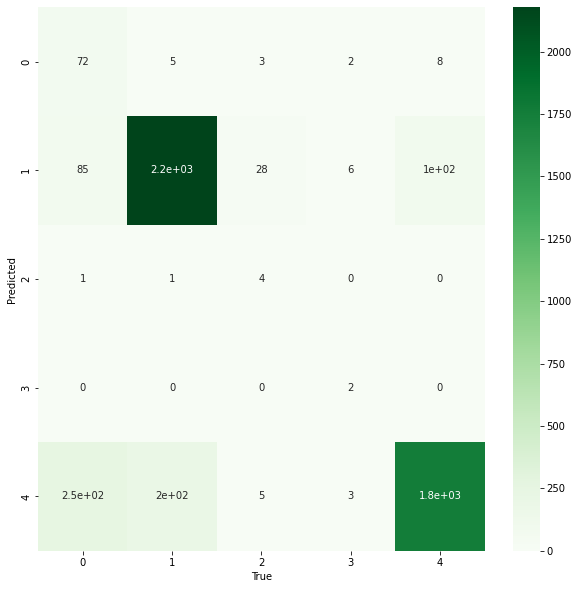

In [43]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## logistic regression

In [44]:
log_reg_smote = LogisticRegression(C=0.05, multi_class='multinomial', solver='saga', class_weight="balanced", max_iter=10000)
log_reg_smote.fit(X_res, y_res)

y_pred = log_reg_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8526605893576426
F1-score [0.33333333 0.90168067 0.12244898 0.06896552 0.87591241]
              precision    recall  f1-score   support

  harassment      0.214     0.756     0.333        90
non-toxicity      0.908     0.895     0.902      2397
      racism      0.065     1.000     0.122         6
    violence      0.036     1.000     0.069         2
   vulgarity      0.953     0.810     0.876      2222

    accuracy                          0.853      4717
   macro avg      0.435     0.892     0.460      4717
weighted avg      0.915     0.853     0.877      4717



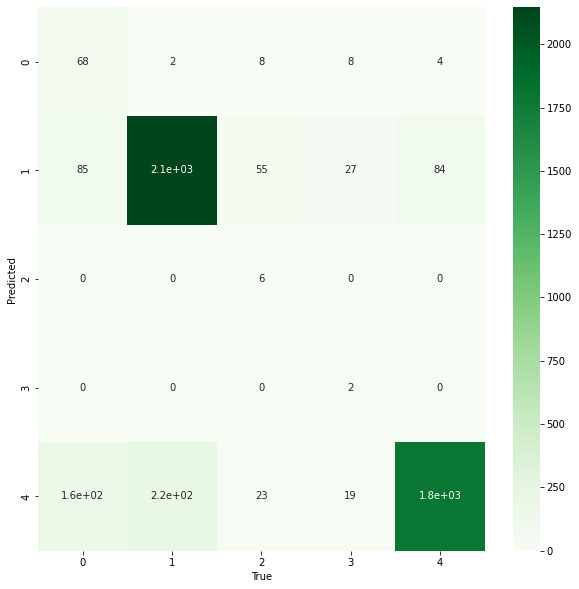

In [45]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## SVM

In [46]:
svm_smote = LinearSVC(C=1.0, random_state=42)
svm_smote.fit(X_res, y_res)

y_pred = svm_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8959084163663346
F1-score [0.50364964 0.913339   0.42857143 0.16666667 0.90661831]
              precision    recall  f1-score   support

  harassment      0.375     0.767     0.504        90
non-toxicity      0.930     0.897     0.913      2397
      racism      0.273     1.000     0.429         6
    violence      0.100     0.500     0.167         2
   vulgarity      0.913     0.900     0.907      2222

    accuracy                          0.896      4717
   macro avg      0.518     0.813     0.584      4717
weighted avg      0.910     0.896     0.901      4717



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


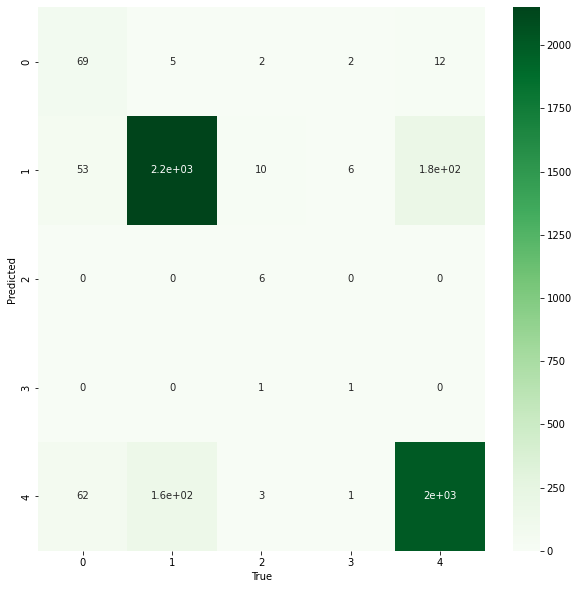

In [47]:
plt.figure(figsize=(10,10))
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

# SHAP

Random forest con smote

In [48]:
import shap
shap.initjs()

In [49]:
X_test.shape

(4717, 34)

In this plot, the impact of a feature on the classes is stacked to create the feature importance plot. <br>
Thus, if you created features in order to differentiate a particular class from the rest, that is the plot where you can see it. <br>
In other words, the summary plot for multiclass classification can show you what the machine managed to learn from the features.

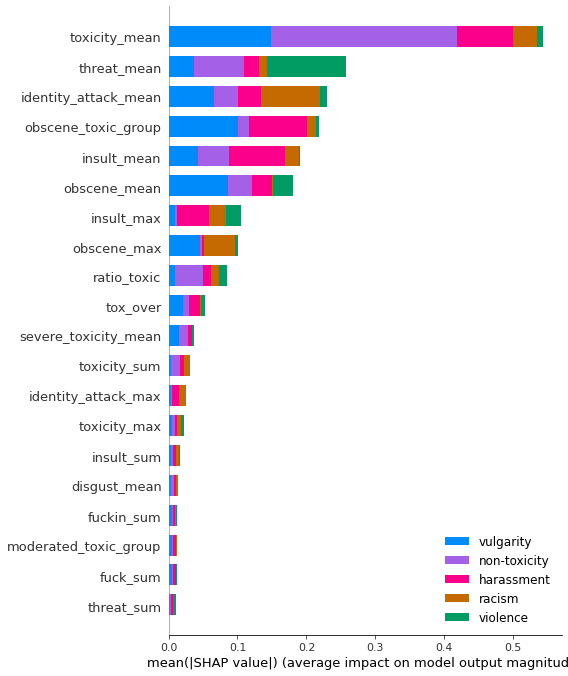

CPU times: user 11min 52s, sys: 2.28 s, total: 11min 54s
Wall time: 11min 54s


In [50]:
%%time
#SUMMARY PLOT
class_names = ["harassment","non-toxicity","racism","violence","vulgarity"]

explainer = shap.TreeExplainer(rf_balanced_smote)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test.values, plot_type="bar", class_names=class_names, feature_names = X_test.columns)


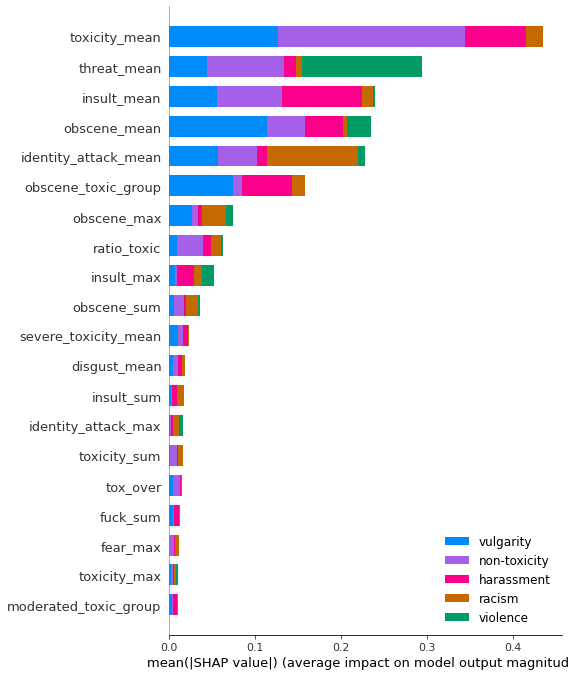

CPU times: user 7min 5s, sys: 2.2 s, total: 7min 7s
Wall time: 7min 6s


In [51]:
%%time
#SUMMARY PLOT
class_names = ["harassment","non-toxicity","racism","violence","vulgarity"]

explainer = shap.TreeExplainer(rf_balanced)

# Calcola i valori SHAP per il set di test
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test.values, plot_type="bar", class_names=class_names, feature_names = X_test.columns)


## shap locale, uno per classe su rf

In [52]:
# Applica un campionamento sul dataset di test (ad esempio, prendi 500 righe)
#X_sample = pd.DataFrame(X_test).sample(n=1000, random_state=42)

In [53]:
def for:
%%time
explainer = shap.TreeExplainer(rf_balanced_smote)

shap_values = explainer.shap_values(X_test)

SyntaxError: invalid syntax (1260555215.py, line 1)

In [ ]:
print(df.iloc[88, 184])
print(df.iloc[11031, 184])
print(df.iloc[1370, 184])
print(df.iloc[6933, 184])
print(df.iloc[2081, 184])

In [ ]:
X_test.index

In [ ]:
y_pred_proba = rf_balanced_smote.predict_proba(X_test)
y_pred_proba[list(X_test.index).index(6933)]

In [ ]:
y_pred = rf_balanced_smote.predict(X_test)
y_pred[list(X_test.index).index(88)]

In [ ]:
y_pred = rf_balanced_smote.predict(X_test)
y_pred[list(X_test.index).index(6933)]

In [ ]:
y_pred = rf_balanced_smote.predict(X_test)
y_pred[list(X_test.index).index(2081)]

In [ ]:
y_pred = rf_balanced_smote.predict(X_test)
y_pred[list(X_test.index).index(11031)]

In [ ]:
y_pred = rf_balanced_smote.predict(X_test)
y_pred[list(X_test.index).index(1370)]

RF predice male 6933 e 1370

In [ ]:
def xai_force(tox, record):
    return shap.plots._waterfall.waterfall_legacy(explainer.expected_value[tox], shap_values[tox][list(X_test.index).index(record)], feature_names = X_test.columns,max_display=10)
    #return shap.force_plot(explainer.expected_value[tox], shap_values[tox][list(X_test.index).index(record)], X_test.iloc[list(X_test.index).index(record)])

# 1370, è harassment ma predetto come vulgarity

In [ ]:
xai_force(0, 1370)

In [ ]:
xai_force(1, 1370)

In [ ]:
xai_force(2, 1370)

In [ ]:
xai_force(3, 1370)

In [ ]:
xai_force(4, 1370)

# 6933, è racism ma predetto come non-toxicity

In [ ]:
xai_force(0, 6933)

In [ ]:
xai_force(1, 6933)

In [ ]:
xai_force(2, 6933)

In [ ]:
xai_force(3, 6933)

In [ ]:
xai_force(4, 6933)